Series de Tiempo (Datos VS Tiempo)

Es una secuencia de datos recolectado en intervalos regulares de tiempo. Se utiliza para analizar fen칩menos que cambian con el tiempo, como ventas mensuales, precios diarios, temperatura por hora.

Componentes: 
* Tendencia
* Estacionalidad
* Ciclos
* Ruido

Importancia:
* Predicci칩n de valores futuros
* Detecci칩n de patrones y anomal칤as
* Toma de decisiones
* Planeaci칩n de recursos

Una serie de tiempo debe de_
* Tener una media constante
* Varianza constante
* Estructura temporal constante

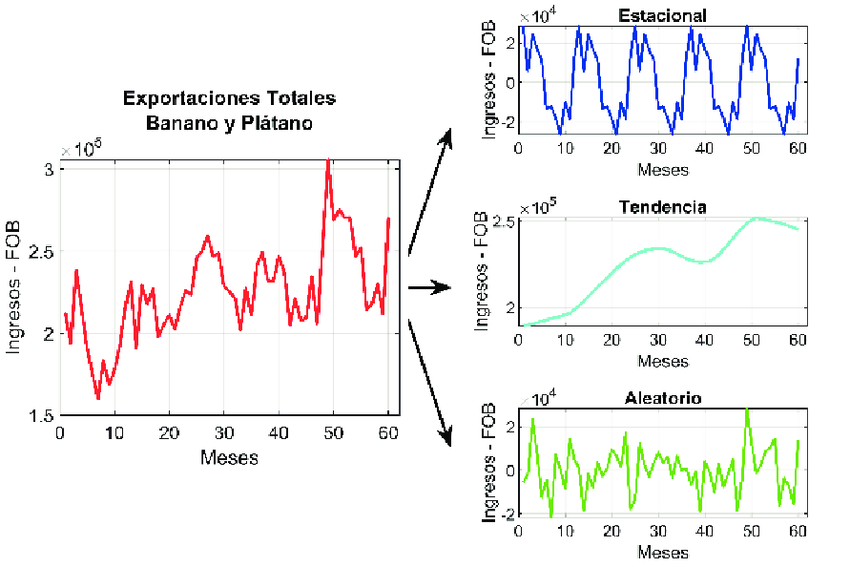






ARIMA: Modelo estad칤stico usado para analizar y predecir series de tiempo

* Autoregresivo: Usa los valores pasados para predecir el actual
* Integrado: Diferencia de datos para volverlos estacioanrios.
* Media: Usa los erros de predicci칩n paraa mejorar la predici칩n actual.

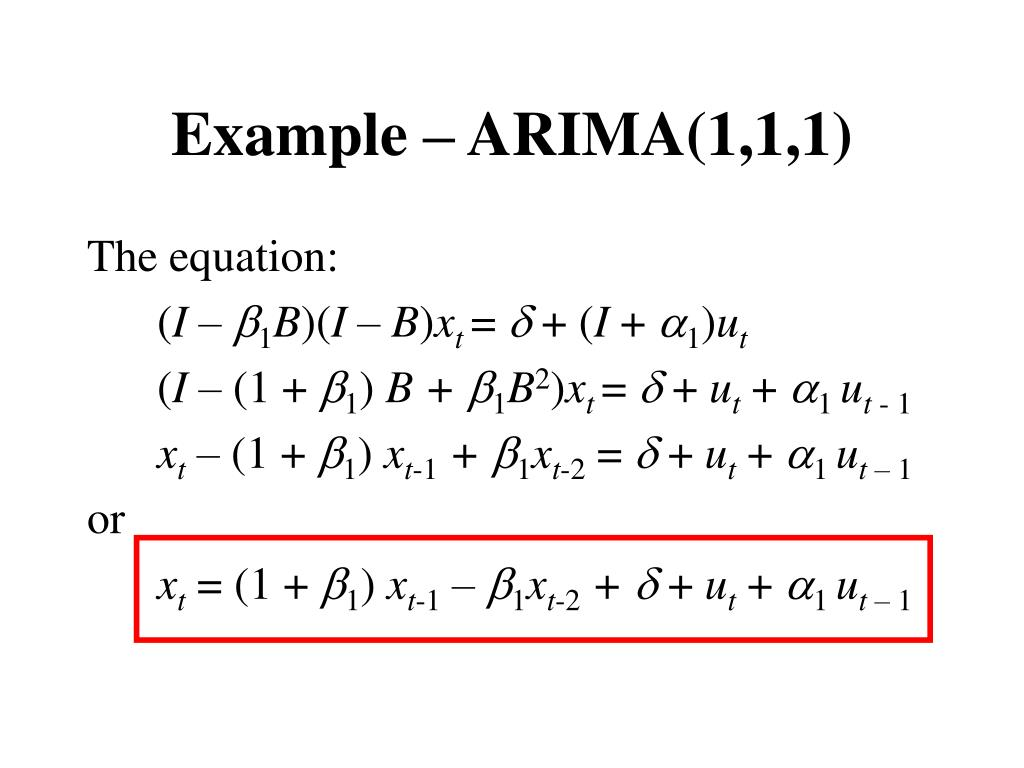

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [52]:
from pmdarima import auto_arima
from IPython.display import display, HTML
pd.options.display.float_format = '{:,.2f}'.format
datos_ventas = pd.read_csv('C:\\Users\\yetla\\Downloads\\forecast.csv')
display(datos_ventas.head(10))

periodo       ventas
0   2001-6   665,262.96
1   2001-7 2,573,039.56
2   2001-8 2,104,739.32
3   2001-9 1,642,062.77
4  2001-10 3,666,605.86
5  2001-11 2,860,528.74
6  2001-12 1,774,872.60
7   2002-1 3,188,935.63
8   2002-2 2,539,739.50
9   2002-3 1,877,312.48

In [6]:
#Nos interesa mostrar la cola
datos_ventas.tail()

periodo       ventas
33  2004-3 4,566,378.74
34  2004-4 6,252,689.90
35  2004-5 6,609,300.99
36  2004-6 2,106,732.50
37  2004-7    54,151.48

In [3]:
#Checamos los tipos de datos
datos_ventas.dtypes

periodo     object
ventas     float64
dtype: object

In [53]:
#Psaremos a convertir el periodo a datetime
datos_ventas['periodo'] = pd.to_datetime(datos_ventas['periodo'], format='%Y-%m')
#Comprobamos el cambio  
datos_ventas.dtypes

periodo    datetime64[ns]
ventas            float64
dtype: object

In [54]:
#Procedemos a indexar el periodo, es decir convertir la lcolumna period en el 칤ndice del df
datos_ventas.set_index('periodo', inplace=True)
#Comprobamos que el 칤ndice es correcto  
datos_ventas.index 

DatetimeIndex(['2001-06-01', '2001-07-01', '2001-08-01', '2001-09-01',
               '2001-10-01', '2001-11-01', '2001-12-01', '2002-01-01',
               '2002-02-01', '2002-03-01', '2002-04-01', '2002-05-01',
               '2002-06-01', '2002-07-01', '2002-08-01', '2002-09-01',
               '2002-10-01', '2002-11-01', '2002-12-01', '2003-01-01',
               '2003-02-01', '2003-03-01', '2003-04-01', '2003-05-01',
               '2003-06-01', '2003-07-01', '2003-08-01', '2003-09-01',
               '2003-10-01', '2003-11-01', '2003-12-01', '2004-01-01',
               '2004-02-01', '2004-03-01', '2004-04-01', '2004-05-01',
               '2004-06-01', '2004-07-01'],
              dtype='datetime64[ns]', name='periodo', freq=None)

<Axes: xlabel='periodo'>

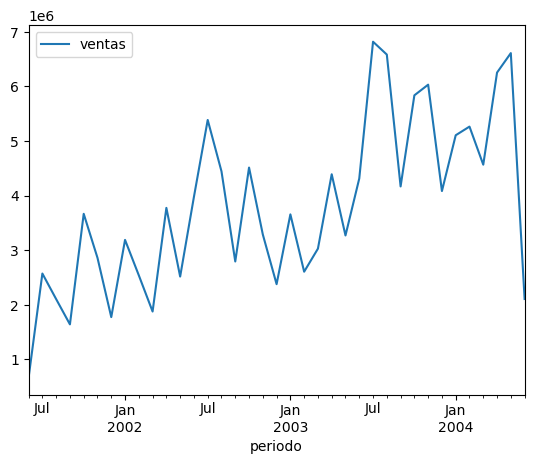

In [55]:
#usualmente si queremos eliminar el ultimo observaci칩n por algun error
datos_ventas.drop(datos_ventas.tail(1).index, inplace=True)
#Ahora para poder observar el comportamiento de nuestros datos de una forma visual
datos_ventas.plot()




Ahora es tiempo de verificar si mi serie de tiempo es estacionaria?
Recordmeos que una serie es estacioanria si , tiene media constante y varianza  constante.

Una ra칤z unitaria desde el punto de vista estad칤stico, significa que la serie dde tiempo tiene memoria a largo plazo, es decir, que el valor de hoy depende del valor de ayer.

Por lo tanto una serie con ra칤z unitaria no es estacionaria. Lo anterior nos lleva a anaizar la prueba de Dickey-Fuller y por la tanto necesitamos introducir la hipotesis nula y la hipoteisis alternativa.


* Hipotesis nula: La serie tiene una ra칤z unitaria y por lo tanto no es estacionaria.
* Hipotesis alternativa: La serie no tiene ra칤z unitaria, esto impic a que es estacioanria. 

La prueba poseee un nivel de significancia que indica la porbabilidad de que la hipotesis nula sea cierto.
* si p es amyor de 0.5 la serie no es estacionaria, no se rechaza la hipotesis nula, es decir la sserie es estacionaria.
* si p es menor de 0.5 se rechaza la hipotesis nula, es decir la serie es estacioanria.


In [56]:
#Probemos la estacionalidad de nuestros datos
#from pmdarima import ADFTest # La prueba de dickfuller 
from pmdarima.arima.stationarity import ADFTest  # Importa ADFTest desde el m칩dulo correcto
adf_test = ADFTest(alpha=0.05) # 5% de significancia
#Esto quiere decir que solicitamos un 95% de confianza
#El resultado nos dice si los datos son estacionarios o no, si son estacionarios no es necesario diferenciar los datos
adf_test.should_diff(datos_ventas)


(0.2570208182830874, True)

Debido a que genera un valor encima de 0.05 entonces hay un alata probabilidad de que la serie tenga ra칤z unitaria es decir NO ES ESTACIONARIA.

Recordemos que si la serie tiene ra칤z unitaria, es decir, no es estacionaria la serie posee tendencia (creciente o decreciente) y por lo tanto no es confiable oara modelar. Lo cual implica que hay que aplicat un tratamiento de los datos de la serie. Esta vez aplicaremos la DIFERENCIACI칍N.

Diferenciaci칩 es una formula recursiva: Y = Yt - Yt-1

<Axes: xlabel='periodo'>

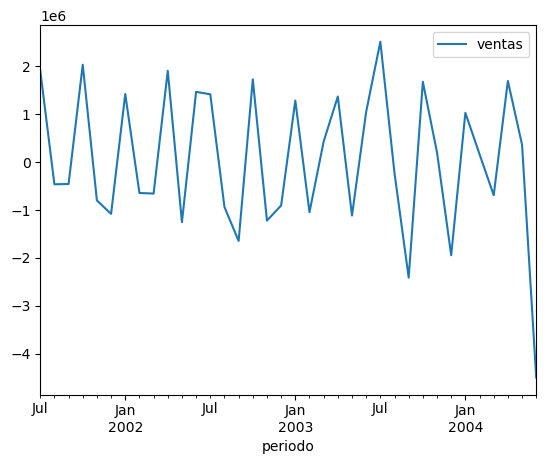

In [57]:
#Aplicamos diferenciaci칩n estacional a los datos
datos_ventas_diff = datos_ventas.diff().dropna()

#Ahora si, checamos VISUALMENTE 
datos_ventas_diff.plot()

In [58]:
adf_test.should_diff(datos_ventas_diff)

(0.1677259396641974, True)

In [62]:
#Procedemosa construir los conjuntos de entrenamiento y prueba
train = datos_ventas.iloc[:85].dropna()
test = datos_ventas[-20:]

#Mostrar el conjunto de entrenamiento y prueba
print("Conjunto de entrenamiento")
train.tail()


Conjunto de entrenamiento


ventas
periodo                
2004-02-01 5,263,451.43
2004-03-01 4,566,378.74
2004-04-01 6,252,689.90
2004-05-01 6,609,300.99
2004-06-01 2,106,732.50

In [64]:
test.head()


ventas
periodo                
2002-11-01 3,288,061.47
2002-12-01 2,378,170.42
2003-01-01 3,656,427.52
2003-02-01 2,606,553.82
2003-03-01 3,028,796.56

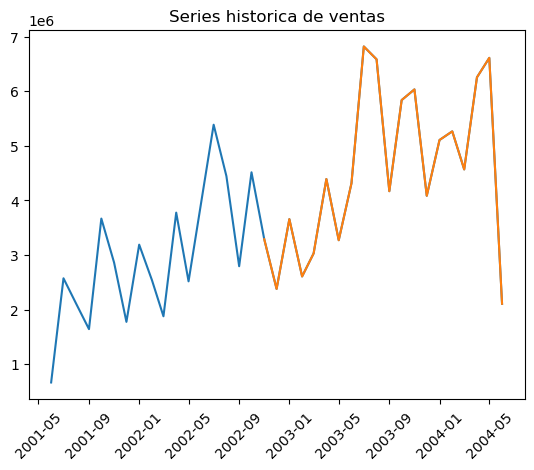

In [65]:

#Ahora si, checamos VISUALMENTE el conjunto de entrenamiento y prueba
plt.plot(train, label='Entrenamiento')
plt.plot(test, label='Prueba')
plt.xticks(rotation=45)
plt.title("Series historica de ventas")
plt.show()

In [66]:
# Configuraci칩n del modelo ARIMA
arima_model = auto_arima(train, start_p=0, d=1, start_q=0,
                        #De que valor se comienza la busqueda de parametros
                         max_p=5, max_d=5, max_q=5,
                         #
                         D=1, start_Q=0, max_P=5, max_D=5,
                         #
                         max_Q=5, m=12, seasonal=True,
                         #
                         error_action="warn", trace=True,
                         suppress_warnings=True, stepwise=True,
                         random_state=20, n_fits=50)



Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=753.923, Time=0.03 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=751.068, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=747.028, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=746.432, Time=0.05 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=745.619, Time=0.00 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=746.374, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=748.335, Time=0.07 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=746.019, Time=0.03 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=745.898, Time=0.02 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=745.308, Time=0.01 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=747.094, Time=0.03 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=748.629, Time=0.07 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=744.064, Time=0.02 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=744.721, Time=0.05 sec
 ARIMA(2,1,0)(0,1,1)[12]         

In [67]:
# Imprimir el resumen del modelo ajustado
print(arima_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   37
Model:             SARIMAX(2, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -369.032
Date:                            Thu, 10 Apr 2025   AIC                            744.064
Time:                                    10:25:20   BIC                            747.598
Sample:                                06-01-2001   HQIC                           745.001
                                     - 06-01-2004                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9310      0.239     -3.902      0.000      -1.399      -0.463
ar.L2         -0.5928      0.495   

In [68]:
# Predecir los pr칩ximos 12 per칤odos (meses)
Prediccion = pd.DataFrame(arima_model.predict(n_periods=12))
Prediccion.columns = ["Prediccion_sales"]
Prediccion


Prediccion_sales
2004-07-01      8,898,386.23
2004-08-01      7,959,103.30
2004-09-01      3,658,813.99
2004-10-01      7,500,113.10
2004-11-01      6,789,919.34
2004-12-01      4,396,633.41
2005-01-01      6,369,503.59
2005-02-01      5,906,423.06
2005-03-01      5,224,270.77
2005-04-01      7,265,105.29
2005-05-01      7,282,811.95
2005-06-01      2,885,618.50

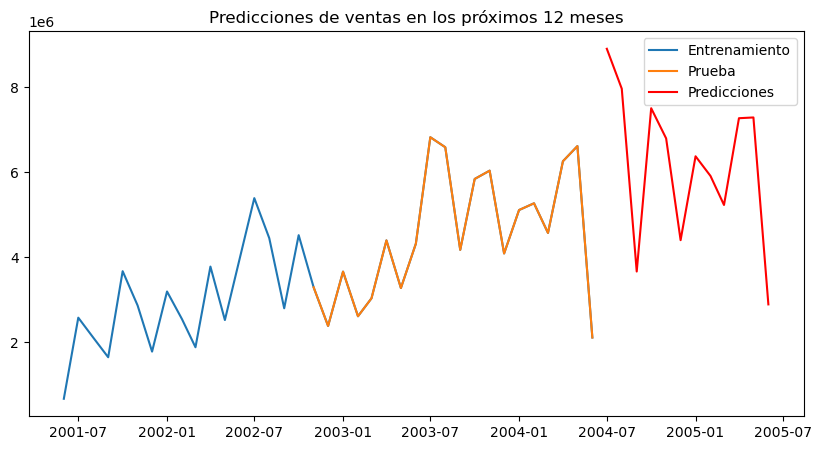

In [71]:
#Graficamos las predicciones
plt.figure(figsize=(10, 5))
plt.plot(train, label='Entrenamiento')
plt.plot(test, label='Prueba')
plt.plot(Prediccion, label='Predicciones', color='red')
plt.title("Predicciones de ventas en los pr칩ximos 12 meses")
plt.legend(loc = "best")
plt.show()

Ejercicio

Analizar mediante series de tiempo si los 13 salones (espacios educativos disponibles en la sede Coyoac치n) ser치n suficientes ante el crecimiento en el n칰mero de estudiantes que ingresan cada 6 meses.

In [1]:
#Coemzamos importando las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from pmdarima import auto_arima
from IPython.display import display, HTML
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
#Cargamos los datos 
datos = pd.read_csv("C:\\Users\\yetla\\Downloads\\PYTHON\\predicciones_estudiantes_arima.csv")
#Y mostramos los mostramos
display(datos)

fecha  predicted  salones_necesarios
0  2029-01-01     685.07               23.00
1  2029-07-01     698.15               24.00
2  2030-01-01     711.22               24.00
3  2030-07-01     724.30               25.00

In [3]:
#Checamos los tipos de datos
datos.dtypes

fecha                  object
predicted             float64
salones_necesarios    float64
dtype: object

In [4]:
#Cambiamos el tipo de dato de la columna periodo a datetime
#Estos cambios son necesarios para poder graficar los datos de forma correcta
#y para poder hacer predicciones
datos['fecha'] = pd.to_datetime(datos['fecha'])
# Comprobamos el cambio
datos.dtypes

fecha                 datetime64[ns]
predicted                    float64
salones_necesarios           float64
dtype: object

In [5]:
#Ahora agregamos la columna fecha como el 칤ndice del df
datos.set_index('fecha', inplace=True)
#Comprobamos que el 칤ndice es correcto
datos.index

DatetimeIndex(['2029-01-01', '2029-07-01', '2030-01-01', '2030-07-01'], dtype='datetime64[ns]', name='fecha', freq=None)

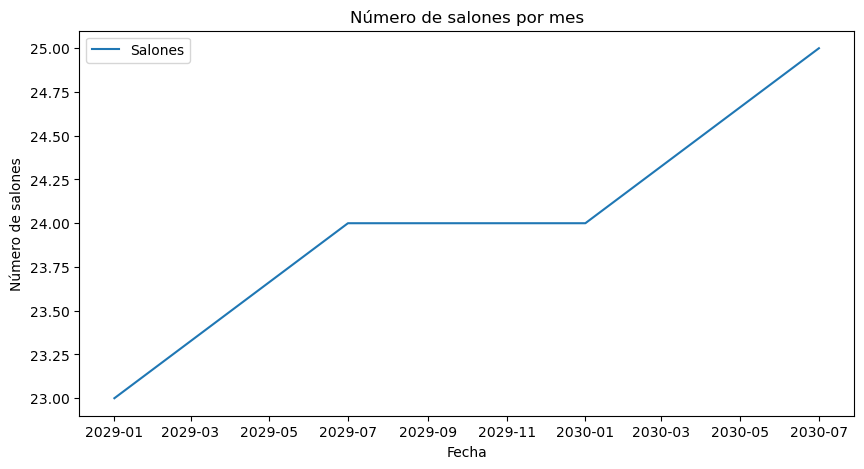

In [6]:
#Graficamos los datos, para ver el comportamiento de los datos
#Donde el eje x es el numero de salones 
#y el eje y es la fecha
plt.figure(figsize=(10, 5))
plt.plot(datos['salones_necesarios'], label='Salones')
plt.title("N칰mero de salones por mes")
plt.xlabel("Fecha")
plt.ylabel("N칰mero de salones")
plt.legend(loc='best')
plt.show()

Antes de continuar con el modelo ARIMA, es importante verificar si los datos son estacionarios o no.


Dado que la prueba ADF internamente utiliza regresi칩n lineal (OLS), y necesita suficientes datos para calcular los coeficientes y residuos. Con solo 4 puntos de datos, no hay suficiente informaci칩n estad칤stica para hacer esto bien. As칤 que procederemos sin la prueba, asumiremos no estacionariedad y aplicaremos la diferenciaci칩n manueal. 

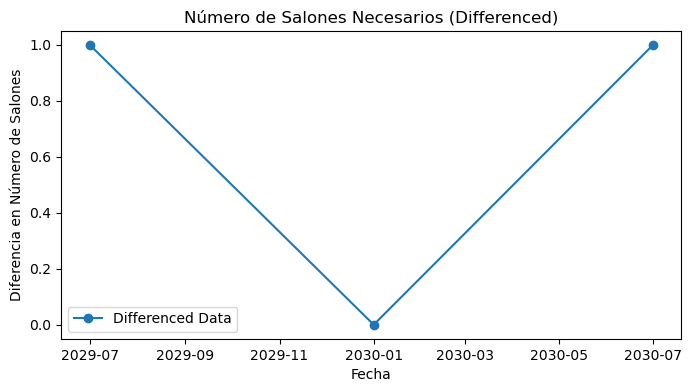

In [8]:
# Aplicamos la prueba de Dickey-Fuller manualmente
data_diff = datos['salones_necesarios'].diff().dropna()

# Visualizaci칩n de los datos diferenciados
plt.figure(figsize=(8, 4))
plt.plot(data_diff, marker='o', label='Differenced Data')
plt.title("N칰mero de Salones Necesarios (Differenced)")
plt.xlabel("Fecha")
plt.ylabel("Diferencia en N칰mero de Salones")
plt.legend()
plt.show()

In [9]:
#Usaremos auto_arima() para buscar los mejores par치metros autom치ticamente:
from pmdarima import auto_arima

# Ajustar el modelo ARIMA autom치ticamente sobre la serie original
modelo = auto_arima(datos['salones_necesarios'],
                    start_p=0, start_q=0,
                    max_p=2, max_q=2,
                    d=1,  # ya diferenciamos manualmente
                    seasonal=False,
                    stepwise=True,
                    suppress_warnings=True,
                    trace=True)

# Mostrar resumen del modelo
print(modelo.summary())


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8.001, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9.297, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.521 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    4
Model:               SARIMAX(0, 1, 0)   Log Likelihood                  -2.001
Date:                Wed, 23 Apr 2025   AIC                              8.001
Time:                        22:42:50   BIC                              6.199
Sample:                    01-01-2029   HQIC                             4.378
                         - 07-01-2030                                         
Covariance Type:  

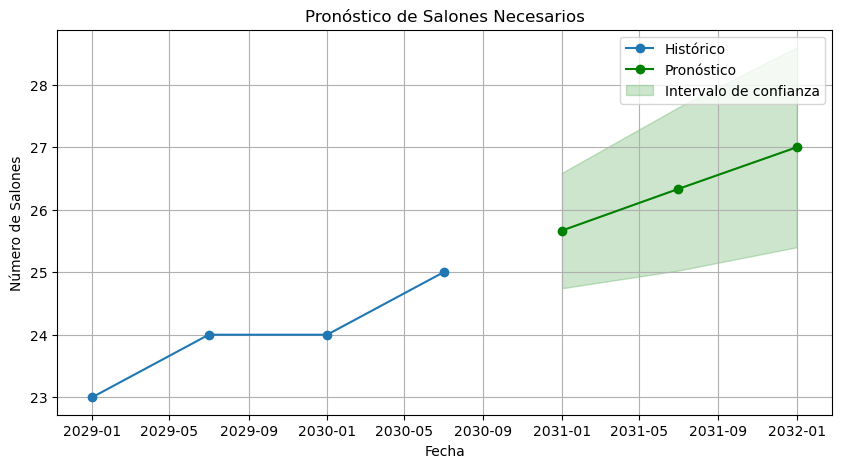

In [12]:
#Supongamos que queremos predecir n meses (3 meses en este caso):
# Predecir los siguientes 3 valores
n_periodos = 3
predicciones, conf_int = modelo.predict(n_periods=n_periodos, return_conf_int=True)

# Crear fechas futuras
fechas_futuras = pd.date_range(start=datos.index[-1] + pd.DateOffset(months=6), periods=n_periodos, freq='6MS')

# Crear DataFrame de predicciones
df_predicciones = pd.DataFrame({
    'fecha': fechas_futuras,
    'predicted_salones': predicciones,
    'lower_bound': conf_int[:, 0],
    'upper_bound': conf_int[:, 1]
})
df_predicciones.set_index('fecha', inplace=True)

# Visualizar
plt.figure(figsize=(10, 5))
plt.plot(datos['salones_necesarios'], label='Hist칩rico', marker='o')
plt.plot(df_predicciones['predicted_salones'], label='Pron칩stico', marker='o', color='green')
plt.fill_between(df_predicciones.index, df_predicciones['lower_bound'], df_predicciones['upper_bound'], 
                 color='green', alpha=0.2, label='Intervalo de confianza')
plt.title('Pron칩stico de Salones Necesarios')
plt.xlabel('Fecha')
plt.ylabel('N칰mero de Salones')
plt.legend()
plt.grid()
plt.show()


## 游늳 Crecimiento constante:
La serie temporal muestra una tendencia creciente en el n칰mero de salones necesarios.   

---

## 游뛂 Insuficiencia clara:
Dado que en la sede **Coyoac치n** actualmente hay solo **13 salones disponibles**, la demanda proyectada casi **duplica** la capacidad actual.  
游녤 Esto representa una **brecha muy significativa**.  

---

## 丘멆잺 Alto riesgo de saturaci칩n:
Si no se ampl칤an los espacios educativos, es altamente probable que se presente **saturaci칩n**, **hacinamiento** o **rechazo de estudiantes**, especialmente en los **pr칩ximos dos a침os**.  

---

## 游늵 El pron칩stico es estable pero firme:
Aunque el modelo proyecta de forma bastante **lineal**, el intervalo de confianza sugiere cierta **incertidumbre**,  
pero en **ning칰n caso baja de 24-25 salones**, lo cual sigue estando **muy por encima** de los **13 disponibles**.  
